<a href="https://colab.research.google.com/github/amrrmadhn/genaibc-lumoshive/blob/master/Study%20Case%20-%202025%20GenAI%20BC/Studi%20Kasus%20Proyek%20ML%20dengan%20Scikit-learn%3A%20Income%20Prediction%20pada%20Adult%20Dataset%20(UCI)/Income%20Prediction%20pada%20Adult%20Dataset%20(UCI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [31]:
pip install ucimlrepo

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [33]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

# EDA

## Data Quality

In [34]:
print("Shape of X (features):")
display(X.shape)
print("Info of X (features):")
display(X.info())
print("Description of X (features):")
display(X.describe(include='all'))

print("\nShape of y (targets):")
display(y.shape)
print("Info of y (targets):")
display(y.info())
print("Description of y (targets):")
display(y.describe(include='all'))

Shape of X (features):


(48842, 14)

Info of X (features):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


None

Description of X (features):


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
count,48842.000000,47879,4.884200e+04,48842,48842.000000,48842,47876,48842,48842,48842,48842.000000,48842.000000,48842.000000,48568
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN



Shape of y (targets):


(48842, 1)

Info of y (targets):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   income  48842 non-null  object
dtypes: object(1)
memory usage: 381.7+ KB


None

Description of y (targets):


,income
count,48842
unique,4
top,<=50K
freq,24720


## Duplicate Handling

In [35]:
df_combined = pd.concat([X, y], axis=1)
duplicate_rows = df_combined.duplicated().sum()
print(f"Jumlah baris duplikat yang ditemukan: {duplicate_rows}")

Jumlah baris duplikat yang ditemukan: 29


In [36]:
df_cleaned = df_combined.drop_duplicates()
X_cleaned = df_cleaned.iloc[:, :-y.shape[1]]
y_cleaned = df_cleaned.iloc[:, -y.shape[1]:]

X = X_cleaned
y = y_cleaned

print("Shape of X (features) after removing duplicates:")
print(X.shape)
print("Shape of y (targets) after removing duplicates:")
print(y.shape)

Shape of X (features) after removing duplicates:
(48813, 14)
Shape of y (targets) after removing duplicates:
(48813, 1)


## Missing Value Handling

In [37]:
print("Missing values in X (features):")
display(X.isnull().sum())

print("\nMissing values in y (targets):")
display(y.isnull().sum())

Missing values in X (features):


,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0



Missing values in y (targets):


,0
income,0


In [38]:
for col in ['workclass', 'occupation', 'native-country']:
    if X[col].isnull().any():
        mode_value = X[col].mode()[0]
        X[col] = X[col].fillna(mode_value)
        print(f"Missing values in column '{col}' filled with mode: {mode_value}")

print("Missing values in X (features) after filling:")
display(X.isnull().sum())

Missing values in column 'workclass' filled with mode: Private
Missing values in column 'occupation' filled with mode: Prof-specialty
Missing values in column 'native-country' filled with mode: United-States
Missing values in X (features) after filling:


,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [39]:
print("Missing values in y (targets):")
display(y.isnull().sum())

Missing values in y (targets):


,0
income,0


# Feature Engineering

## Identifikasi Tipe Fitur

In [40]:
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
Numerical Features: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [41]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Apply One-Hot Encoding to categorical features
encoded_features = encoder.fit_transform(X[categorical_features])

# Create a DataFrame from the encoded features
encoded_feature_names = encoder.get_feature_names_out(categorical_features)
X_encoded = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=X.index)

print("Shape of X_encoded after One-Hot Encoding:", X_encoded.shape)
display(X_encoded.head())

Shape of X_encoded after One-Hot Encoding: (48813, 102)


,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Apply Standard Scaling to numerical features
scaled_features = scaler.fit_transform(X[numerical_features])

# Create a DataFrame from the scaled features
X_scaled = pd.DataFrame(scaled_features, columns=numerical_features, index=X.index)

print("Shape of X_scaled after Standard Scaling:", X_scaled.shape)
display(X_scaled.head())

Shape of X_scaled after Standard Scaling: (48813, 6)


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.025724,-1.061993,1.136595,0.146804,-0.217195,-0.034304
1,0.828125,-1.007118,1.136595,-0.144847,-0.217195,-2.213335
2,-0.047221,0.245993,-0.419685,-0.144847,-0.217195,-0.034304
3,1.046961,0.426618,-1.197826,-0.144847,-0.217195,-0.034304
4,-0.776676,1.408464,1.136595,-0.144847,-0.217195,-0.034304


In [43]:
X_processed = pd.concat([X_encoded, X_scaled], axis=1)

print("Shape of X_processed after combining all features:", X_processed.shape)
display(X_processed.head())

Shape of X_processed after combining all features: (48813, 108)


,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,...,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.025724,-1.061993,1.136595,0.146804,-0.217195,-0.034304
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.828125,-1.007118,1.136595,-0.144847,-0.217195,-2.213335
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-0.047221,0.245993,-0.419685,-0.144847,-0.217195,-0.034304
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.046961,0.426618,-1.197826,-0.144847,-0.217195,-0.034304
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.776676,1.408464,1.136595,-0.144847,-0.217195,-0.034304


# Model Building and Evaluation

## Data Splitting

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (39050, 108)
Shape of X_test: (9763, 108)
Shape of y_train: (39050, 1)
Shape of y_test: (9763, 1)


## Random Forest Model Training

In [45]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier model
model = RandomForestClassifier(random_state=42) # Added random_state for reproducibility

# Train the model
model.fit(X_train, y_train.values.ravel())

print("RandomForestClassifier model initialized and trained successfully.")

RandomForestClassifier model initialized and trained successfully.


## Make Predictions and Evaluate


In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd # Import pandas here if not already imported in the current scope

# Make predictions on the test set
y_pred = model.predict(X_test)

# Clean y_test and y_pred to standardize labels for binary classification
y_test_cleaned = y_test['income'].astype(str).str.replace('.', '', regex=False).str.strip()
y_pred_cleaned = pd.Series(y_pred).astype(str).str.replace('.', '', regex=False).str.strip()

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_cleaned, y_pred_cleaned)
precision = precision_score(y_test_cleaned, y_pred_cleaned, pos_label='>50K')
recall = recall_score(y_test_cleaned, y_pred_cleaned, pos_label='>50K')
f1 = f1_score(y_test_cleaned, y_pred_cleaned, pos_label='>50K')

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.8426
Precision: 0.7027
Recall: 0.6177
F1-Score: 0.6575


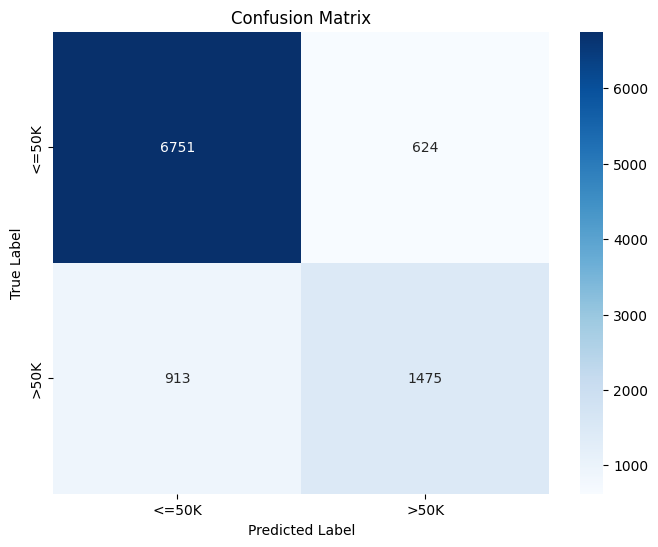

Confusion matrix visualized successfully.


In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test_cleaned, y_pred_cleaned, labels=['<=50K', '>50K'])

# Get the class labels
class_labels = ['<=50K', '>50K']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Confusion matrix visualized successfully.")

# Interpretasi dan Analisis Fitur

## Interpretasi 10 Fitur Terpenting

In [48]:
feature_importances = model.feature_importances_
feature_names = X_processed.columns

# Create a pandas Series for better visualization
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

print("Feature Importances (Top 20):")
display(feature_importance_df.head(20))

Feature Importances (Top 20):


,feature,importance
103,fnlwgt,0.237340
102,age,0.186333
107,hours-per-week,0.108194
105,capital-gain,0.045794
104,education-num,0.037118
106,capital-loss,0.020027
27,marital-status_Married-civ-spouse,0.019898
47,relationship_Husband,0.016552
42,occupation_Prof-specialty,0.014433
4,workclass_Private,0.013823


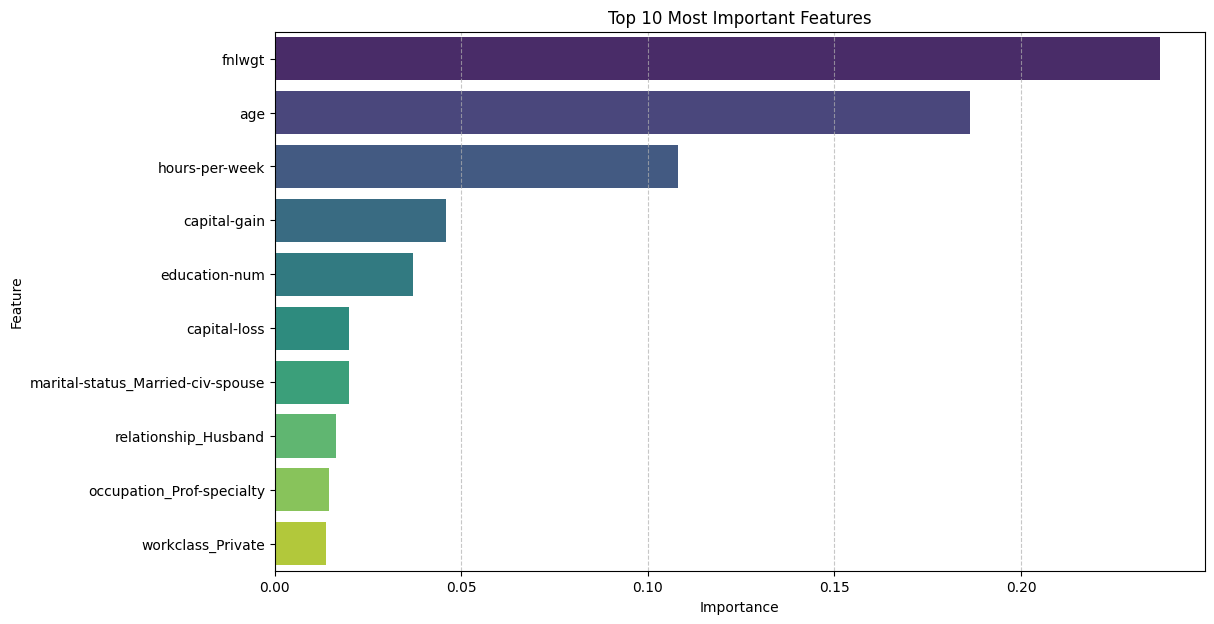

Top 10 most important features visualized successfully.


In [49]:
top_10_features = feature_importance_df.head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x='importance', y='feature', data=top_10_features, palette='viridis', hue='feature', legend=False)
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

print("Top 10 most important features visualized successfully.")

Visualisasi kepentingan fitur mengungkapkan wawasan utama berikut:

1.  **`fnlwgt` (Final Weight):** Fitur ini sejauh ini merupakan yang terpenting. `fnlwgt` merepresentasikan jumlah orang yang diperkirakan oleh sensus diwakili oleh entri tersebut. Meskipun ini adalah bobot statistik, kepentingannya yang tinggi menunjukkan bahwa ia sangat berkorelasi dengan tingkat pendapatan, kemungkinan besar karena cara data sensus dibangun atau diagregasi. Ini adalah indikator segmen populasi daripada atribut individu.

2.  **`age` (Usia):** Usia adalah fitur terpenting kedua, yang intuitif. Pendapatan umumnya meningkat seiring bertambahnya usia karena individu mendapatkan pengalaman, senioritas, dan pendidikan.

3.  **`hours-per-week` (Jam Kerja per Minggu):** Jumlah jam kerja per minggu adalah prediktor yang signifikan. Secara logis, bekerja lebih banyak jam umumnya menghasilkan pendapatan yang lebih tinggi.

4.  **`capital-gain` (Keuntungan Modal):** Fitur ini, yang merepresentasikan pendapatan dari investasi, sangat menunjukkan kekayaan dan dengan demikian merupakan prediktor kuat untuk melebihi pendapatan tahunan $50K. Meskipun ini adalah 'keuntungan modal', ini tetap merupakan bentuk pendapatan, dan orang dengan keuntungan modal yang substansial kemungkinan besar memiliki pendapatan keseluruhan yang lebih tinggi.

5.  **`education-num` (Angka Pendidikan):** Representasi numerik dari tingkat pendidikan ini merupakan indikator yang kuat. Tingkat pendidikan yang lebih tinggi secara konsisten dikaitkan dengan potensi penghasilan yang lebih tinggi.

6.  **`capital-loss` (Kerugian Modal):** Mirip dengan keuntungan modal, kerugian modal juga menunjukkan aktivitas keuangan dan berpotensi kekayaan bersih yang lebih tinggi, bahkan jika itu merepresentasikan kerugian. Orang dengan kerugian modal yang signifikan sering terlibat dalam investasi, yang menyiratkan potensi pendapatan yang lebih tinggi.

7.  **`marital-status_Married-civ-spouse` (Status Pernikahan_Menikah-pasangan-sipil):** Menikah dengan pasangan sipil merupakan indikator positif yang kuat untuk pendapatan yang lebih tinggi. Ini bisa mencerminkan rumah tangga dengan dua pendapatan atau korelasi dengan pekerjaan yang stabil dan kemajuan karier.

8.  **`relationship_Husband` (Hubungan_Suami):** Fitur ini, kemungkinan terkait dengan `marital-status_Married-civ-spouse`, lebih lanjut menekankan peran suami dalam rumah tangga yang sudah menikah sebagai prediktor utama, sering dikaitkan dengan pencari nafkah utama dalam konteks dataset.

9.  **`occupation_Prof-specialty` (Pekerjaan_Spesialisasi-Profesional):** Pekerjaan spesialisasi profesional (misalnya, dokter, pengacara, insinyur) biasanya bergaji tinggi, menjadikannya prediktor yang kuat.

10. **`workclass_Private` (Kelas Kerja_Swasta):** Bekerja di sektor swasta juga penting, meskipun implikasi spesifiknya mungkin bergantung pada kontras dengan kategori kelas kerja lainnya. Ini adalah kategori besar dan kemungkinan menangkap sebagian besar penghasilan tinggi dibandingkan dengan, misalnya, 'Tanpa-bayaran' atau 'Tidak-pernah-bekerja'.

## Rekomendasi Perbaikan Model


Berdasarkan metrik evaluasi (Akurasi: 0.8426, Presisi: 0.7027, Recall: 0.6177, F1-Score: 0.6575) dan matriks kebingungan, berikut adalah beberapa rekomendasi yang dapat ditindaklanjuti untuk meningkatkan kinerja model, terutama dalam memprediksi kelas '>50K' pendapatan:

1.  **Atasi Ketidakseimbangan Kelas (Class Imbalance):**
    *   Dataset kemungkinan memiliki ketidakseimbangan kelas (lebih banyak instansi '<=50K' daripada '>50K'), yang umum dalam tugas prediksi pendapatan. Hal ini ditunjukkan oleh recall yang relatif lebih rendah untuk kelas '>50K' dibandingkan dengan akurasi.
    *   **Rekomendasi:** Gunakan teknik seperti **SMOTE (Synthetic Minority Over-sampling Technique)** untuk meningkatkan jumlah sampel kelas minoritas (`>50K`) dalam data pelatihan. Atau, pertimbangkan **undersampling** kelas mayoritas, atau menggunakan **bobot kelas (class weights)** di `RandomForestClassifier` (misalnya, `class_weight='balanced'`).

2.  **Rekayasa & Pemilihan Fitur Berdasarkan Kepentingan:**
    *   `fnlwgt` sangat penting tetapi mewakili bobot statistik. Investigasi lebih lanjut tentang sifat dan potensi biasnya diperlukan. Jika dianggap memperkenalkan bias atau tidak secara langsung terkait dengan pendapatan individu, perannya mungkin perlu dievaluasi ulang.
    *   **Rekomendasi:** Jelajahi pembuatan istilah interaksi atau fitur polinomial untuk fitur numerik yang sangat penting seperti `age`, `hours-per-week`, `capital-gain`, dan `education-num`. Misalnya, `age * education-num` mungkin menangkap hubungan yang lebih kompleks.
    *   **Rekomendasi:** Pertimbangkan untuk menggabungkan beberapa fitur kategorikal atau membuat fitur hierarkis jika pengetahuan domain mendukungnya (misalnya, mengelompokkan kategori `occupation` yang serupa).

3.  **Penyetelan Hyperparameter (Hyperparameter Tuning):**
    *   Model Random Forest saat ini menggunakan hyperparameter default (kecuali `random_state`). Hyperparameter yang optimal dapat secara signifikan meningkatkan kinerja.
    *   **Rekomendasi:** Lakukan **penyetelan hyperparameter** yang lebih ekstensif menggunakan teknik seperti `GridSearchCV` atau `RandomizedSearchCV`. Parameter kunci yang perlu disetel untuk Random Forest meliputi `n_estimators` (jumlah pohon), `max_features` (jumlah fitur yang dipertimbangkan pada setiap pembagian), `max_depth` (kedalaman maksimum pohon), `min_samples_split`, dan `min_samples_leaf`.

4.  **Metode Ensemble dan Stacking Model:**
    *   Meskipun Random Forest adalah metode ensemble, menggabungkannya dengan model beragam lainnya dapat menghasilkan hasil yang lebih baik.
    *   **Rekomendasi:** Eksperimen dengan model klasifikasi kuat lainnya seperti **Gradient Boosting Machines (misalnya, XGBoost, LightGBM)** atau **Support Vector Machines (SVMs)**. Pertimbangkan **stacking atau blending** beberapa model, di mana prediksi beberapa model dasar digunakan sebagai input untuk meta-learner.

5.  **Analisis Kesalahan pada Klasifikasi yang Salah (Error Analysis on Misclassifications):**
    *   Matriks kebingungan menunjukkan sejumlah besar false negatives (aktual '>50K' diprediksi sebagai '<=50K') dan false positives (aktual '<=50K' diprediksi sebagai '>50K').
    *   **Rekomendasi:** Analisis karakteristik sampel yang salah diklasifikasikan. Apakah ada pola dalam fitur false positives atau false negatives? Ini dapat mengungkapkan bias tersembunyi atau area di mana model kesulitan dan memandu rekayasa fitur lebih lanjut atau upaya pengumpulan data.

6.  **Penyesuaian Ambang Batas (Threshold Adjustment):**
    *   Untuk model klasifikasi, ambang batas keputusan default seringkali 0.5. Menyesuaikan ambang batas ini dapat meningkatkan presisi atau recall tergantung pada tujuan bisnis spesifik.
    *   **Rekomendasi:** Jika memprediksi '>50K' lebih kritis (misalnya, meminimalkan false negatives), pertimbangkan untuk menurunkan ambang batas keputusan. Jika meminimalkan false positives lebih penting, naikkan ambang batas. Gunakan **kurva precision-recall** untuk memandu penyesuaian ini.

## Ringkasan Temuan dan Rekomendasi


### Data Analysis Key Findings

*   **10 Fitur Terpenting untuk Prediksi Pendapatan**: Model Random Forest mengidentifikasi `fnlwgt` (Final Weight) sebagai fitur terpenting, diikuti oleh `age` (Usia), `hours-per-week` (Jam Kerja per Minggu), `capital-gain` (Keuntungan Modal), dan `education-num` (Angka Pendidikan). Fitur-fitur lain yang signifikan termasuk `capital-loss` (Kerugian Modal), `marital-status_Married-civ-spouse` (Status Pernikahan\_Menikah-pasangan-sipil), `relationship_Husband` (Hubungan\_Suami), `occupation_Prof-specialty` (Pekerjaan\_Spesialisasi-Profesional), dan `workclass_Private` (Kelas Kerja\_Swasta).
*   **Peran `fnlwgt`**: Meskipun `fnlwgt` adalah bobot statistik yang merepresentasikan segmen populasi, kepentingannya yang tinggi menunjukkan korelasi kuat dengan tingkat pendapatan, kemungkinan besar karena cara data sensus dikumpulkan atau diagregasi.
*   **Metrik Evaluasi Model**: Model awal menunjukkan kinerja sebagai berikut: Akurasi: 0.8426, Presisi: 0.7027, Recall: 0.6177, F1-Score: 0.6575. Recall yang relatif rendah untuk kelas '>50K' mengindikasikan kesulitan dalam mengidentifikasi semua individu berpendapatan tinggi.

### Insights or Next Steps

*   **Peningkatan Prediksi Pendapatan Tinggi**: Untuk secara signifikan meningkatkan kemampuan model dalam memprediksi individu berpendapatan tinggi (kelas '>50K'), fokus pada mengatasi ketidakseimbangan kelas menggunakan teknik seperti SMOTE atau bobot kelas, dan menganalisis secara mendalam kesalahan klasifikasi untuk mengungkap pola yang dapat menginformasikan rekayasa fitur lebih lanjut.
*   **Optimalisasi Model Komprehensif**: Lakukan penyetelan hyperparameter ekstensif untuk Random Forest dan eksplorasi model ensemble yang lebih canggih (misalnya, XGBoost, LightGBM) atau teknik stacking. Pertimbangkan untuk menyesuaikan ambang batas keputusan berdasarkan prioritas bisnis (misalnya, minimalkan *false negatives* vs. *false positives*).
